In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')
df = pd.read_csv('C:/Users/LG/Desktop/problem1.csv')

1번
날씨 온도 예측, 종속변수 :actual(최고온도) temp_1 : 전날 최고온도 temp_2 : 전전날 최고온도 friend : 친구의 예측온도

1-1 데이터 확인 및 전처리
데이터 EDA 수행 ==> 아래 수행함
결측치를 확인하고 처리 방안에 대해 논의하라 ==> 결측치가 없는데?
데이터 분할 방법 설명 ==> train / test set split 을 설명하라는 건가?
최종 데이터셋이 적절함을 주장하라 ==> 

In [21]:
## 1. 데이터정보, target, 독립변수 확인 : 날씨온도(actual) 예측 문제(회귀)
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


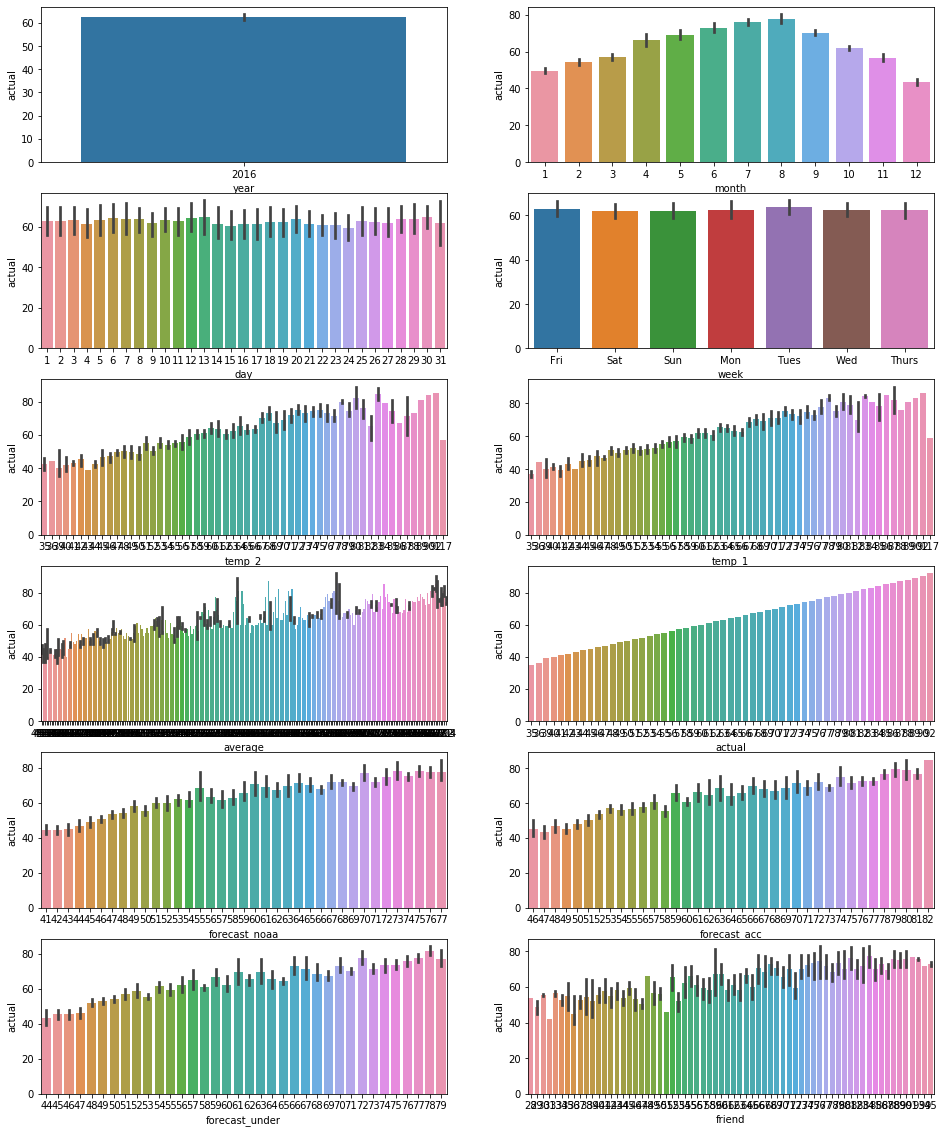

In [42]:
## 2) 상관관계 보기

# 주요 칼럼별로 target(actual 온도) 가 어떻게 분포되어있는지 시각화
fig, axs = plt.subplots(figsize=(16,20), ncols=2, nrows=6)
cat_features = df.columns
for i, feature in enumerate(cat_features):
    row = int(i/2)
    col = i%2
    sns.barplot(x=feature, y='actual', data=df, ax=axs[row][col])

In [23]:
## 2. 피쳐엔지니어링 (null값 대체, 날짜변경, 이상치, 회귀-원핫인코딩, 분류-라벨링, 로그변환, 표준화)
# 1) 문자로 변경하여 처리 -> 원핫인코딩
df['year'] = df['year'].astype('str')
df['month'] = df['month'].astype('str')
df['day'] = df['day'].astype('str')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    object 
 1   month           348 non-null    object 
 2   day             348 non-null    object 
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 32.8+ KB


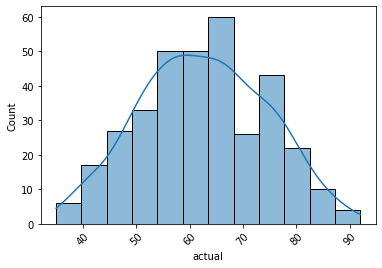

In [41]:
# 3) 타깃값의 분포 정규분포인지 확인 -> 정규분포 ok
plt.xticks(rotation=45)
sns.histplot(df['actual'], kde=True)
plt.show()

1-2 Random Forest 모델 적합 및 검증
Random Forest 학습 및 예측 결과 해석
예측 결과 검정 해석, 중요변수 도출
변수 중요성 분석 및 그래프 출력

In [44]:
# 원핫인코딩
y_df = df['actual']
X_df = df.drop('actual', axis=1)
# one hot encoding
X_df_ohe = pd.get_dummies(X_df, columns=['year', 'month', 'day','week'])

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR

X_train, X_test, y_train, y_test = train_test_split(X_df_ohe, y_df, test_size=0.3, random_state=42)

In [60]:
# 모델과 학습/테스트 세트를 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)

def evaluate_regr(y_test, pred):
    rmse_val = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    print('rmse:{0:.3f},r2:{1:.3f}'.format(rmse_val, r2))
    
    
# 모델별로 평가수행
rf_reg = RandomForestRegressor(n_estimators=100)
svm_reg = LinearSVR(epsilon=1) # epsilon 클수록 마진이 큼

for model in [rf_reg, svm_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test)

### RandomForestRegressor ###
rmse:5.081,r2:0.835
### LinearSVR ###
rmse:5.228,r2:0.825


In [64]:
rf_cross_val_neg = cross_val_score(rf_reg, X_df_ohe, y_df, scoring='neg_mean_squared_error', cv=5)
rf_cross_rmse = np.mean(np.sqrt(-1*rf_cross_val_neg))
svm_cross_val_neg = cross_val_score(svm_reg, X_df_ohe, y_df, scoring='neg_mean_squared_error', cv=5)
svm_cross_rmse = np.mean(np.sqrt(-1*svm_cross_val_neg))

print('rf_rmse_cv: ',np.round(rf_cross_rmse),2)
print('svm_rmse_cv: ',np.round(svm_cross_rmse),2)

rf_rmse_cv:  5.0 2
svm_rmse_cv:  6.0 2


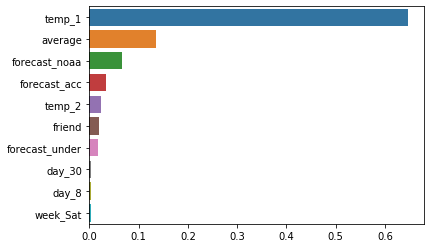

In [71]:
rf_feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_df_ohe.columns).sort_values(ascending=False)[:10]
sns.barplot(x=rf_feature_series, y=rf_feature_series.index)

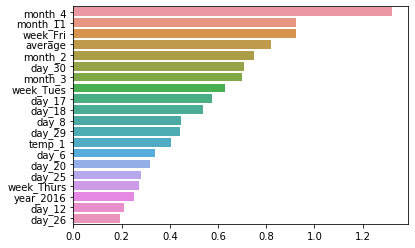

In [76]:
# SVM 피쳐중요도 -> 회귀계수로 보여줌
coef = pd.Series(svm_reg.coef_, index=X_df_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [ ]:
1-3 SVM(Support Vector Machine) 모델 적합 및 검증
svm 학습 및 예측 결과 해석
예측 결과 검정 해석, 중요변수 도출
변수 중요성 분석 및 그래프 출력


     
1-4 모델 비교 및 향후 개선 방향 도출¶
Random Forest, SVM 모델의 결과 비교 후 최종 모델 선택
두 모델의 장단점 분석, 추후 운영 관점에서 어떤 모델을 선택할 것인가?
모델링 관련 추후 개선 방향 제시 --> rf모델선택, 앙상블모델이라 예측력이 높고 추후 grid search CV사용 or 트리모델 이용한 lgbm이나 xgboost사용

     

In [ ]:
2번
5분간격의 가구별 전력 사용량의 데이터 데이터 출처 : 자체생성
2-1 데이터 전처리
각 가구의 15분 간격의 전력량의 합을 구하고 해당데이터를 바탕으로 총 5개의 군집으로 군집화를 진행한 후 아래의 그림과 같은 형태로 출력하라.
 군집화를 위한 데이터 구성의 이유를 설명하라 (군집 방식에 따라 Cluster컬럼의 값은 달라질수 있음)

In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('C:/Users/LG/Desktop/problem2.csv')

In [41]:
df.loc[df.houseCode == 'house_01'].sort_values('date')

,houseCode,date,power consumption
150941,house_01,2050-01-01 00:00:00,62.006582
124585,house_01,2050-01-01 00:05:00,212.461705
8059,house_01,2050-01-01 00:10:00,85.876966
11920,house_01,2050-01-01 00:15:00,56.902428
325526,house_01,2050-01-01 00:20:00,156.206826
...,...,...,...
86687,house_01,2050-01-31 23:35:00,48.051831
398172,house_01,2050-01-31 23:40:00,229.224845
58299,house_01,2050-01-31 23:45:00,116.502810
4089,house_01,2050-01-31 23:50:00,82.948218


In [69]:
import datetime as dt
# datetime(year, month, day, hour=0, minute=0, second=0, microsecond=0, tzinfo=None)
# dt = datetime.datetime(2018, 2, 1, 12, 15, 30, 2000)
df['date'] = df.date.apply(pd.to_datetime)

# 1/31 기준으로 전력측정시간 차이구함
df['date_diff'] = df['date']-dt.datetime(2050,1,1,0,0)
# df['date_diff_seconds'] = df['date_diff'].dt.seconds
df['date_diff_minutes'] = df['date_diff'].dt.seconds/(60*15)

In [84]:
# df.groupby('host_name').size().\
#                 to_frame().rename(columns={0:'counts'}).\
#                 sort_values('counts',ascending=False)

## 이름 어떻게 변경?
df_final = df[['houseCode','date_diff_seconds','power consumption']]\
    .groupby(['houseCode','date_diff_seconds'],as_index=False).sum('power consumption')

In [82]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   houseCode          12960 non-null  object 
 1   date_diff_seconds  12960 non-null  int64  
 2   power consumption  12960 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 303.9+ KB


In [73]:
# 분포 확인
df['date_diff_minutes'].value_counts().sort_values(ascending=True)

84.000000    1395
19.666667    1395
91.333333    1395
2.333333     1395
88.000000    1395
             ... 
52.333333    1395
18.666667    1395
37.333333    1395
3.666667     1395
60.666667    1395
Name: date_diff_minutes, Length: 288, dtype: int64

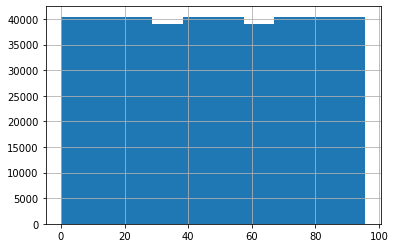

In [72]:
df['date_diff_minutes'].hist()

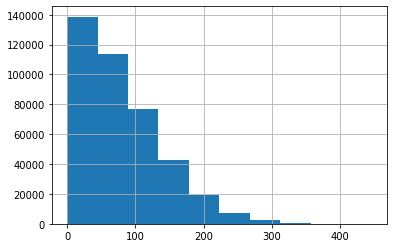

In [16]:
df['power consumption'].hist()

In [100]:
x = np.array(df_final['power consumption']).reshape(-1,1)

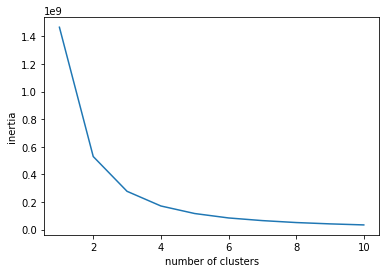

In [105]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1,11):
    kmeans_plus = KMeans(n_clusters=i, init='k-means++')
    kmeans_plus.fit(x)
    inertia.append(kmeans_plus.inertia_)

plt.plot(range(1,11), inertia)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

In [130]:
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

x_features = df_final[['date_diff_seconds','power consumption']].values

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(x_features)
df_final['cluster_label'] = labels

print('실루엣스코어:{0:.3f}'.format(silhouette_score(x, labels)))

실루엣스코어:-0.014


In [ ]:
2-2 히트맵
2-1의 데이터를 바탕으로 각 군집의 요일, 15분간격별 전력사용량의 합을 구한 후 아래와 같이 시각화 하여라 (수치는 동일하지 않을 수 있음 2-1의 데이터가 정확하게 아래와 같은 이미지로 변환 됐는지 주로 확인)

In [118]:
df['week'].value_counts()

2     90720
4     90720
3     90720
1     90720
52    25920
5     12960
Name: week, dtype: int64

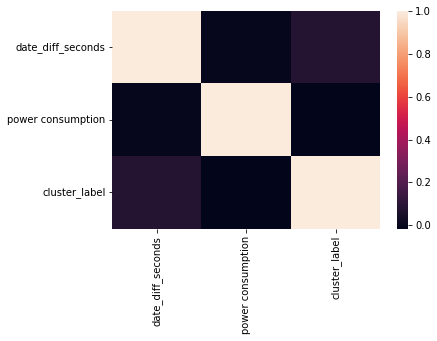

In [131]:
## week변환후 해야함..
corr = df_final.corr()
sns.heatmap(corr)
plt.show()

In [134]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 0495-B4CB

 C:\Users\LG\ADP study - 보은\23년 6월 대비 ADP 실기 디렉터리

2023-05-14  오후 01:34    <DIR>          .
2023-05-12  오후 11:40    <DIR>          ..
2023-05-13  오후 07:57    <DIR>          .ipynb_checkpoints
2023-02-23  오후 11:03             1,679 bike sharing demand.ipynb
2023-05-09  오전 12:05             1,698 EDA process.ipynb
2023-05-09  오후 11:08             1,968 Untitled.ipynb
2023-05-12  오후 11:43               555 Untitled1.ipynb
2023-05-13  오후 07:57                72 Untitled2.ipynb
2023-05-05  오전 11:27           135,451 누구나 파이썬 통계분석.ipynb
2023-05-14  오후 01:34           207,293 스터디-2주차.ipynb
2023-05-13  오후 01:34            96,237 자전거수요.ipynb
2023-05-13  오후 02:00            59,274 캐글 주택 가격.ipynb
2023-05-13  오전 12:07           152,280 파이썬 머신러닝 완벽가이드 - 타이타닉 생존자예측 분류.ipynb
2023-05-09  오후 07:56           259,921 파이썬 머신러닝 완벽가이드.ipynb
2023-05-09  오전 12:06    <DIR>          파이썬 한권으로 끝내기
              11개 파일             916,428 바이트
               4개 디렉터리  86,